<a href="https://colab.research.google.com/github/coughlinjennie/data71200/blob/main/projects/DATA71200_Project2_Coughlin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#About My Data
This NYC housing sales data from Kaggle includes fields for broker, bedrooms, bathrooms, type of unit (Condo, Co-op, Multi-Family, House) and a number of location fields. The sample view of the data on Kaggle showed the location data was fairly messy, especially on the locality and sublocality fields, so I'll need to figure out which field is best to use to capture the location of the unit.   


In [ ]:
#Import the libraries and install scikit-learn
import numpy as np
import pandas as pd
from pandas.plotting import scatter_matrix
import requests
import io


!pip install -U scikit-learn==1.4

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 20.2 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


#Step 1: Acquire the Data
Since this needs to be data I can use for predictions with labels, instead of the typical sale price, I'm going to use the TYPE field as my target: Can I build a model that will accurately predict if a building is a condo, a co-op, a single-family house or a multi-family dwelling?

In [ ]:
#Import the data, sourced from Kaggle and stored in my GitHub
url = "https://raw.githubusercontent.com/coughlinjennie/data71200/main/projects/nyhousing.csv" # Make sure the url is the raw version of the file on GitHub
download = requests.get(url).content


In [ ]:
#Load the data

housing = pd.read_csv(io.StringIO(download.decode('utf-8')))

In [ ]:
#View the data to find the label field

housing.head()

,BROKERTITLE,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,ADDRESS,STATE,MAIN_ADDRESS,ADMINISTRATIVE_AREA_LEVEL_2,LOCALITY,SUBLOCALITY,STREET_NAME,LONG_NAME,FORMATTED_ADDRESS,LATITUDE,LONGITUDE
0,Brokered by Douglas Elliman -111 Fifth Ave,Condo for sale,315000,2,2.000000,1400.0,2 E 55th St Unit 803,"New York, NY 10022","2 E 55th St Unit 803New York, NY 10022",New York County,New York,Manhattan,East 55th Street,Regis Residence,"Regis Residence, 2 E 55th St #803, New York, N...",40.761255,-73.974483
1,Brokered by Serhant,Condo for sale,195000000,7,10.000000,17545.0,Central Park Tower Penthouse-217 W 57th New Yo...,"New York, NY 10019",Central Park Tower Penthouse-217 W 57th New Yo...,United States,New York,New York County,New York,West 57th Street,"217 W 57th St, New York, NY 10019, USA",40.766393,-73.980991
2,Brokered by Sowae Corp,House for sale,260000,4,2.000000,2015.0,620 Sinclair Ave,"Staten Island, NY 10312","620 Sinclair AveStaten Island, NY 10312",United States,New York,Richmond County,Staten Island,Sinclair Avenue,"620 Sinclair Ave, Staten Island, NY 10312, USA",40.541805,-74.196109
3,Brokered by COMPASS,Condo for sale,69000,3,1.000000,445.0,2 E 55th St Unit 908W33,"Manhattan, NY 10022","2 E 55th St Unit 908W33Manhattan, NY 10022",United States,New York,New York County,New York,East 55th Street,"2 E 55th St, New York, NY 10022, USA",40.761398,-73.974613
4,Brokered by Sotheby's International Realty - E...,Townhouse for sale,55000000,7,2.373861,14175.0,5 E 64th St,"New York, NY 10065","5 E 64th StNew York, NY 10065",United States,New York,New York County,New York,East 64th Street,"5 E 64th St, New York, NY 10065, USA",40.767224,-73.969856


Type is definitely the label field, although I'm going to need to find all the distinct values when I clean to make sure they're all the same, so now I know enough to split my data.

#Step 2: Splitting the Data
Before I go any further, time to split the data.

In [ ]:
#Set the labels on TYPE

y = housing["TYPE"]

In [ ]:
#Set the data

X = housing.drop("TYPE", axis=1)
print(X)

                                            BROKERTITLE      PRICE  BEDS  \
0           Brokered by Douglas Elliman  -111 Fifth Ave     315000     2   
1                                   Brokered by Serhant  195000000     7   
2                                Brokered by Sowae Corp     260000     4   
3                                   Brokered by COMPASS      69000     3   
4     Brokered by Sotheby's International Realty - E...   55000000     7   
...                                                 ...        ...   ...   
4796                                Brokered by COMPASS     599000     1   
4797                    Brokered by Mjr Real Estate Llc     245000     1   
4798      Brokered by Douglas Elliman - 575 Madison Ave    1275000     1   
4799            Brokered by E Realty International Corp     598125     2   
4800                 Brokered by Nyc Realty Brokers Llc     349000     1   

           BATH  PROPERTYSQFT  \
0      2.000000   1400.000000   
1     10.000000  1754

In [ ]:
#Divide the data into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


#Step 3: Exploration
In data journalism, I was trained not to do anything until I looked at the data, so splitting it first feels backward, although I understand why it's different for machine learning.

In [ ]:
#Explore the training set

housing.head()

,BROKERTITLE,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,ADDRESS,STATE,MAIN_ADDRESS,ADMINISTRATIVE_AREA_LEVEL_2,LOCALITY,SUBLOCALITY,STREET_NAME,LONG_NAME,FORMATTED_ADDRESS,LATITUDE,LONGITUDE
0,Brokered by Douglas Elliman -111 Fifth Ave,Condo for sale,315000,2,2.000000,1400.0,2 E 55th St Unit 803,"New York, NY 10022","2 E 55th St Unit 803New York, NY 10022",New York County,New York,Manhattan,East 55th Street,Regis Residence,"Regis Residence, 2 E 55th St #803, New York, N...",40.761255,-73.974483
1,Brokered by Serhant,Condo for sale,195000000,7,10.000000,17545.0,Central Park Tower Penthouse-217 W 57th New Yo...,"New York, NY 10019",Central Park Tower Penthouse-217 W 57th New Yo...,United States,New York,New York County,New York,West 57th Street,"217 W 57th St, New York, NY 10019, USA",40.766393,-73.980991
2,Brokered by Sowae Corp,House for sale,260000,4,2.000000,2015.0,620 Sinclair Ave,"Staten Island, NY 10312","620 Sinclair AveStaten Island, NY 10312",United States,New York,Richmond County,Staten Island,Sinclair Avenue,"620 Sinclair Ave, Staten Island, NY 10312, USA",40.541805,-74.196109
3,Brokered by COMPASS,Condo for sale,69000,3,1.000000,445.0,2 E 55th St Unit 908W33,"Manhattan, NY 10022","2 E 55th St Unit 908W33Manhattan, NY 10022",United States,New York,New York County,New York,East 55th Street,"2 E 55th St, New York, NY 10022, USA",40.761398,-73.974613
4,Brokered by Sotheby's International Realty - E...,Townhouse for sale,55000000,7,2.373861,14175.0,5 E 64th St,"New York, NY 10065","5 E 64th StNew York, NY 10065",United States,New York,New York County,New York,East 64th Street,"5 E 64th St, New York, NY 10065, USA",40.767224,-73.969856


I already saw TYPE was the label column.

Main Address seems to end in the ZIP code, so I can slice that out into a new field to get a location field that should group more or less by neighborhood.

The Admin area/locality/sublocality fields collectivelu contain the borough, but it doesn't seem consistent. I can probably run a series of if statements to write a new column for borough, but the ZIP code should suffice for location. I can always create a dict off the ZIP codes if I think borough would give me something more than the ZIP code.

I think I'll keep the long_name field since it's possible that might factor in if something is named vs. just labeled with its street.

Brokers, price, beds, bath, square footage and address all are fields I want to keep.

In [ ]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4801 entries, 0 to 4800
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   BROKERTITLE                  4801 non-null   object 
 1   TYPE                         4801 non-null   object 
 2   PRICE                        4801 non-null   int64  
 3   BEDS                         4801 non-null   int64  
 4   BATH                         4801 non-null   float64
 5   PROPERTYSQFT                 4801 non-null   float64
 6   ADDRESS                      4801 non-null   object 
 7   STATE                        4801 non-null   object 
 8   MAIN_ADDRESS                 4801 non-null   object 
 9   ADMINISTRATIVE_AREA_LEVEL_2  4801 non-null   object 
 10  LOCALITY                     4801 non-null   object 
 11  SUBLOCALITY                  4801 non-null   object 
 12  STREET_NAME                  4801 non-null   object 
 13  LONG_NAME         

All the fields seem to be the correct dtype, which is good.

In [ ]:
housing.describe()

,PRICE,BEDS,BATH,PROPERTYSQFT,LATITUDE,LONGITUDE
count,4.801000e+03,4801.000000,4801.000000,4801.000000,4801.000000,4801.000000
mean,2.356940e+06,3.356801,2.373861,2184.207862,40.714227,-73.941601
std,3.135525e+07,2.602315,1.946962,2377.140894,0.087676,0.101082
min,2.494000e+03,1.000000,0.000000,230.000000,40.499546,-74.253033
25%,4.990000e+05,2.000000,1.000000,1200.000000,40.639375,-73.987143
50%,8.250000e+05,3.000000,2.000000,2184.207862,40.726749,-73.949189
75%,1.495000e+06,4.000000,3.000000,2184.207862,40.771923,-73.870638
max,2.147484e+09,50.000000,50.000000,65535.000000,40.912729,-73.702450


The max for both beds and baths is 50, which seems like it must be counting some apartment building as one unit. I'll have to watch for that.

#Step 4: Data Cleaning
Cleaning my data is probably the weirdest step for me because up until this class, I've done it using Sheets/Excel or text files where I could look at the data as I'm working on it. Even though I saved a master copy before starting on this, it feels a little like dumping it into a black box and hoping I don't break something in the cleaning process.

I had planned a step to clean up file types, but that proved unnecessary, so I deleted.

In [ ]:
#See which values are missing
print(housing.isna().sum().sort_values())

BROKERTITLE                    0
FORMATTED_ADDRESS              0
LONG_NAME                      0
STREET_NAME                    0
SUBLOCALITY                    0
LOCALITY                       0
ADMINISTRATIVE_AREA_LEVEL_2    0
LATITUDE                       0
MAIN_ADDRESS                   0
ADDRESS                        0
PROPERTYSQFT                   0
BATH                           0
BEDS                           0
PRICE                          0
TYPE                           0
STATE                          0
LONGITUDE                      0
dtype: int64


No data is missing? Yay for cleaned data sets. I had code blocks prepped to deal with missing values and impute them as needed, but I can delete those. However, before I can delete the redundant columns, I need to create the ZIP code field.

In [ ]:
#Create a column with the ZIP code of the property
housing["ZIP"] = housing.MAIN_ADDRESS.str[-5:]

In [ ]:
housing.head()

,BROKERTITLE,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,ADDRESS,STATE,MAIN_ADDRESS,ADMINISTRATIVE_AREA_LEVEL_2,LOCALITY,SUBLOCALITY,STREET_NAME,LONG_NAME,FORMATTED_ADDRESS,LATITUDE,LONGITUDE,ZIP
0,Brokered by Douglas Elliman -111 Fifth Ave,Condo for sale,315000,2,2.000000,1400.0,2 E 55th St Unit 803,"New York, NY 10022","2 E 55th St Unit 803New York, NY 10022",New York County,New York,Manhattan,East 55th Street,Regis Residence,"Regis Residence, 2 E 55th St #803, New York, N...",40.761255,-73.974483,10022
1,Brokered by Serhant,Condo for sale,195000000,7,10.000000,17545.0,Central Park Tower Penthouse-217 W 57th New Yo...,"New York, NY 10019",Central Park Tower Penthouse-217 W 57th New Yo...,United States,New York,New York County,New York,West 57th Street,"217 W 57th St, New York, NY 10019, USA",40.766393,-73.980991,10019
2,Brokered by Sowae Corp,House for sale,260000,4,2.000000,2015.0,620 Sinclair Ave,"Staten Island, NY 10312","620 Sinclair AveStaten Island, NY 10312",United States,New York,Richmond County,Staten Island,Sinclair Avenue,"620 Sinclair Ave, Staten Island, NY 10312, USA",40.541805,-74.196109,10312
3,Brokered by COMPASS,Condo for sale,69000,3,1.000000,445.0,2 E 55th St Unit 908W33,"Manhattan, NY 10022","2 E 55th St Unit 908W33Manhattan, NY 10022",United States,New York,New York County,New York,East 55th Street,"2 E 55th St, New York, NY 10022, USA",40.761398,-73.974613,10022
4,Brokered by Sotheby's International Realty - E...,Townhouse for sale,55000000,7,2.373861,14175.0,5 E 64th St,"New York, NY 10065","5 E 64th StNew York, NY 10065",United States,New York,New York County,New York,East 64th Street,"5 E 64th St, New York, NY 10065, USA",40.767224,-73.969856,10065


In [ ]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4801 entries, 0 to 4800
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   BROKERTITLE                  4801 non-null   object 
 1   TYPE                         4801 non-null   object 
 2   PRICE                        4801 non-null   int64  
 3   BEDS                         4801 non-null   int64  
 4   BATH                         4801 non-null   float64
 5   PROPERTYSQFT                 4801 non-null   float64
 6   ADDRESS                      4801 non-null   object 
 7   STATE                        4801 non-null   object 
 8   MAIN_ADDRESS                 4801 non-null   object 
 9   ADMINISTRATIVE_AREA_LEVEL_2  4801 non-null   object 
 10  LOCALITY                     4801 non-null   object 
 11  SUBLOCALITY                  4801 non-null   object 
 12  STREET_NAME                  4801 non-null   object 
 13  LONG_NAME         

The ZIP code field now exists and is a string, so we don't have to worry about leading zeros, although I don't think there are any in the city, and it will get treated as a categorical variable.

In [ ]:
# Create a list of redundant column names to drop
to_drop = ["LONGITUDE", "LATITUDE", "ADDRESS", "ADMINISTRATIVE_AREA_LEVEL_2", "LOCALITY", "SUBLOCALITY", "FORMATTED_ADDRESS", "MAIN_ADDRESS"]

# Drop those columns from the dataset
housing_subset = housing.drop(to_drop, axis = 1)

# View the new first few rows
housing_subset.head()


,BROKERTITLE,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,STATE,STREET_NAME,LONG_NAME,ZIP
0,Brokered by Douglas Elliman -111 Fifth Ave,Condo for sale,315000,2,2.000000,1400.0,"New York, NY 10022",East 55th Street,Regis Residence,10022
1,Brokered by Serhant,Condo for sale,195000000,7,10.000000,17545.0,"New York, NY 10019",New York,West 57th Street,10019
2,Brokered by Sowae Corp,House for sale,260000,4,2.000000,2015.0,"Staten Island, NY 10312",Staten Island,Sinclair Avenue,10312
3,Brokered by COMPASS,Condo for sale,69000,3,1.000000,445.0,"Manhattan, NY 10022",New York,East 55th Street,10022
4,Brokered by Sotheby's International Realty - E...,Townhouse for sale,55000000,7,2.373861,14175.0,"New York, NY 10065",New York,East 64th Street,10065


This still has a few different address columns, but it looks like the state one preserves my ability to add a borough column later if needed, so I think this is good. Now to see if I need to make substitutions in the type column.

In [ ]:
#View unique values in TYPE

pd.unique(housing_subset["TYPE"])

array(['Condo for sale', 'House for sale', 'Townhouse for sale',
       'Co-op for sale', 'Multi-family home for sale', 'For sale',
       'Contingent', 'Land for sale', 'Foreclosure', 'Pending',
       'Coming Soon', 'Mobile house for sale', 'Condop for sale'],
      dtype=object)

All of those are separate values, but some of those categories are ones that aren't useful for the type of analysis I'm doing, like "Pending" and "Coming Soon" — those are status of the property vs. type of property.  

In [ ]:
# Delete all rows with column 'TYPE' has certain values
indexType = housing_subset[ (housing_subset['TYPE'] == "For sale") | (housing_subset['TYPE'] == "Contingent") | (housing_subset['TYPE'] == "Land for sale") | (housing_subset['TYPE'] == "Foreclosure") | (housing_subset['TYPE'] == "Pending") | (housing_subset['TYPE'] == "Coming Soon") ].index
housing_subset.drop(indexType , inplace=True)

In [ ]:
#View unique values in TYPE to make sure it's cleaned

pd.unique(housing_subset["TYPE"])

array(['Condo for sale', 'House for sale', 'Townhouse for sale',
       'Co-op for sale', 'Multi-family home for sale',
       'Mobile house for sale', 'Condop for sale'], dtype=object)

Now the type of sale only contains values that reference the type of property it is.

In [ ]:
housing_subset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4385 entries, 0 to 4800
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   BROKERTITLE   4385 non-null   object 
 1   TYPE          4385 non-null   object 
 2   PRICE         4385 non-null   int64  
 3   BEDS          4385 non-null   int64  
 4   BATH          4385 non-null   float64
 5   PROPERTYSQFT  4385 non-null   float64
 6   STATE         4385 non-null   object 
 7   STREET_NAME   4385 non-null   object 
 8   LONG_NAME     4385 non-null   object 
 9   ZIP           4385 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 376.8+ KB


The cleaning and subsetting only dropped out about 415 of the 4800 rows, so a fairly small number. And now I know which steps need to be done on the training and testing sets when I move to project 2.

#Step 5: Visualizations
Next, I'm visualizing my data

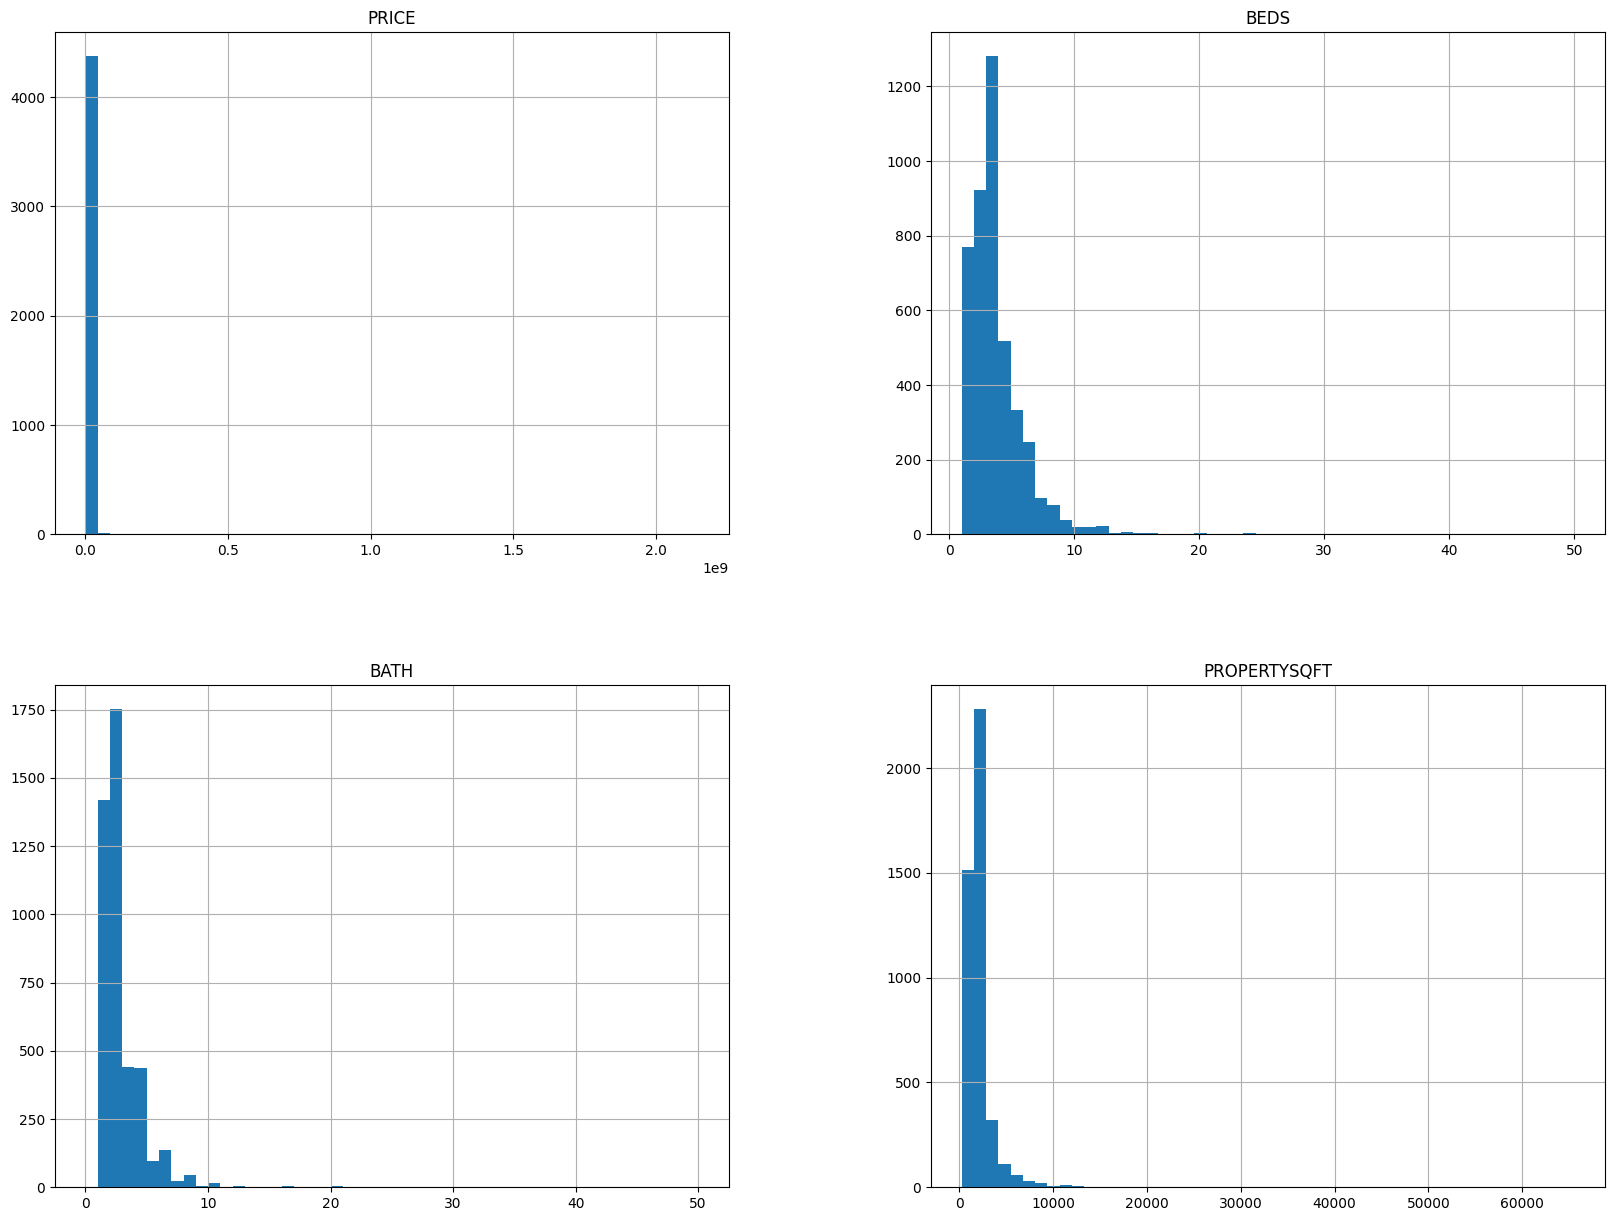

In [ ]:
#Visualize the data using histograms
%matplotlib inline
import matplotlib.pyplot as plt
housing_subset.hist(bins=50, figsize=(20,15))
plt.show()

array([[<Axes: xlabel='PRICE', ylabel='PRICE'>,
        <Axes: xlabel='BEDS', ylabel='PRICE'>,
        <Axes: xlabel='BATH', ylabel='PRICE'>,
        <Axes: xlabel='PROPERTYSQFT', ylabel='PRICE'>],
       [<Axes: xlabel='PRICE', ylabel='BEDS'>,
        <Axes: xlabel='BEDS', ylabel='BEDS'>,
        <Axes: xlabel='BATH', ylabel='BEDS'>,
        <Axes: xlabel='PROPERTYSQFT', ylabel='BEDS'>],
       [<Axes: xlabel='PRICE', ylabel='BATH'>,
        <Axes: xlabel='BEDS', ylabel='BATH'>,
        <Axes: xlabel='BATH', ylabel='BATH'>,
        <Axes: xlabel='PROPERTYSQFT', ylabel='BATH'>],
       [<Axes: xlabel='PRICE', ylabel='PROPERTYSQFT'>,
        <Axes: xlabel='BEDS', ylabel='PROPERTYSQFT'>,
        <Axes: xlabel='BATH', ylabel='PROPERTYSQFT'>,
        <Axes: xlabel='PROPERTYSQFT', ylabel='PROPERTYSQFT'>]],
      dtype=object)

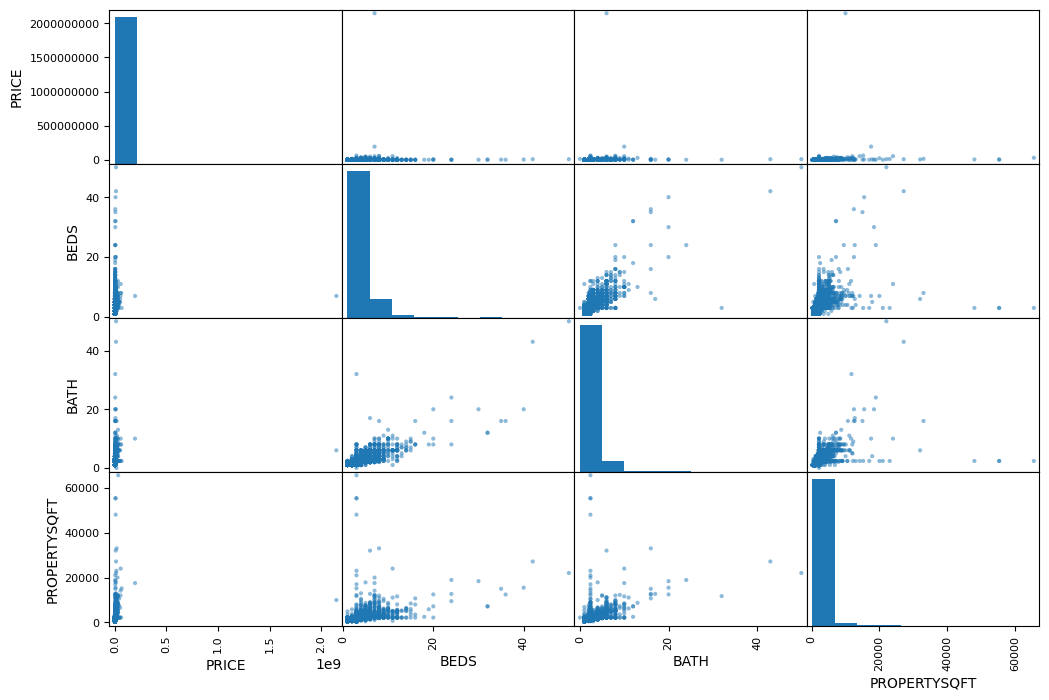

In [ ]:
#Visualize the data using scatter plots
from pandas.plotting import scatter_matrix

attributes = ["PRICE", "BEDS", "BATH",
              "PROPERTYSQFT"]
scatter_matrix(housing_subset[attributes], figsize=(12, 8))

There seem to be more multi-family properties in this dataset than I expected, given the large number of records with more than 10 bedrooms. Also, that one penthouse on W 57th is a huge outlier for price, and I think is probably an error since it's over $2B. I'm going to remove it.

In [ ]:
#Drop all properties values that sold for more than $1B

housing_clean = housing_subset[housing_subset['PRICE'] <= 100000000]

In [ ]:
housing_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4383 entries, 0 to 4800
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   BROKERTITLE   4383 non-null   object 
 1   TYPE          4383 non-null   object 
 2   PRICE         4383 non-null   int64  
 3   BEDS          4383 non-null   int64  
 4   BATH          4383 non-null   float64
 5   PROPERTYSQFT  4383 non-null   float64
 6   STATE         4383 non-null   object 
 7   STREET_NAME   4383 non-null   object 
 8   LONG_NAME     4383 non-null   object 
 9   ZIP           4383 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 376.7+ KB


In [ ]:
housing_clean.describe()

,PRICE,BEDS,BATH,PROPERTYSQFT
count,4.383000e+03,4383.000000,4383.000000,4383.000000
mean,1.929472e+06,3.368925,2.382298,2193.559875
std,4.190731e+06,2.676642,1.998483,2446.870202
min,4.950000e+04,1.000000,0.000000,250.000000
25%,4.990000e+05,2.000000,1.000000,1199.000000
50%,8.480000e+05,3.000000,2.000000,2184.207862
75%,1.499999e+06,4.000000,3.000000,2184.207862
max,6.500000e+07,50.000000,50.000000,65535.000000


It dropped two outliers, so the max sales price is now $65M. Now to view the data again.

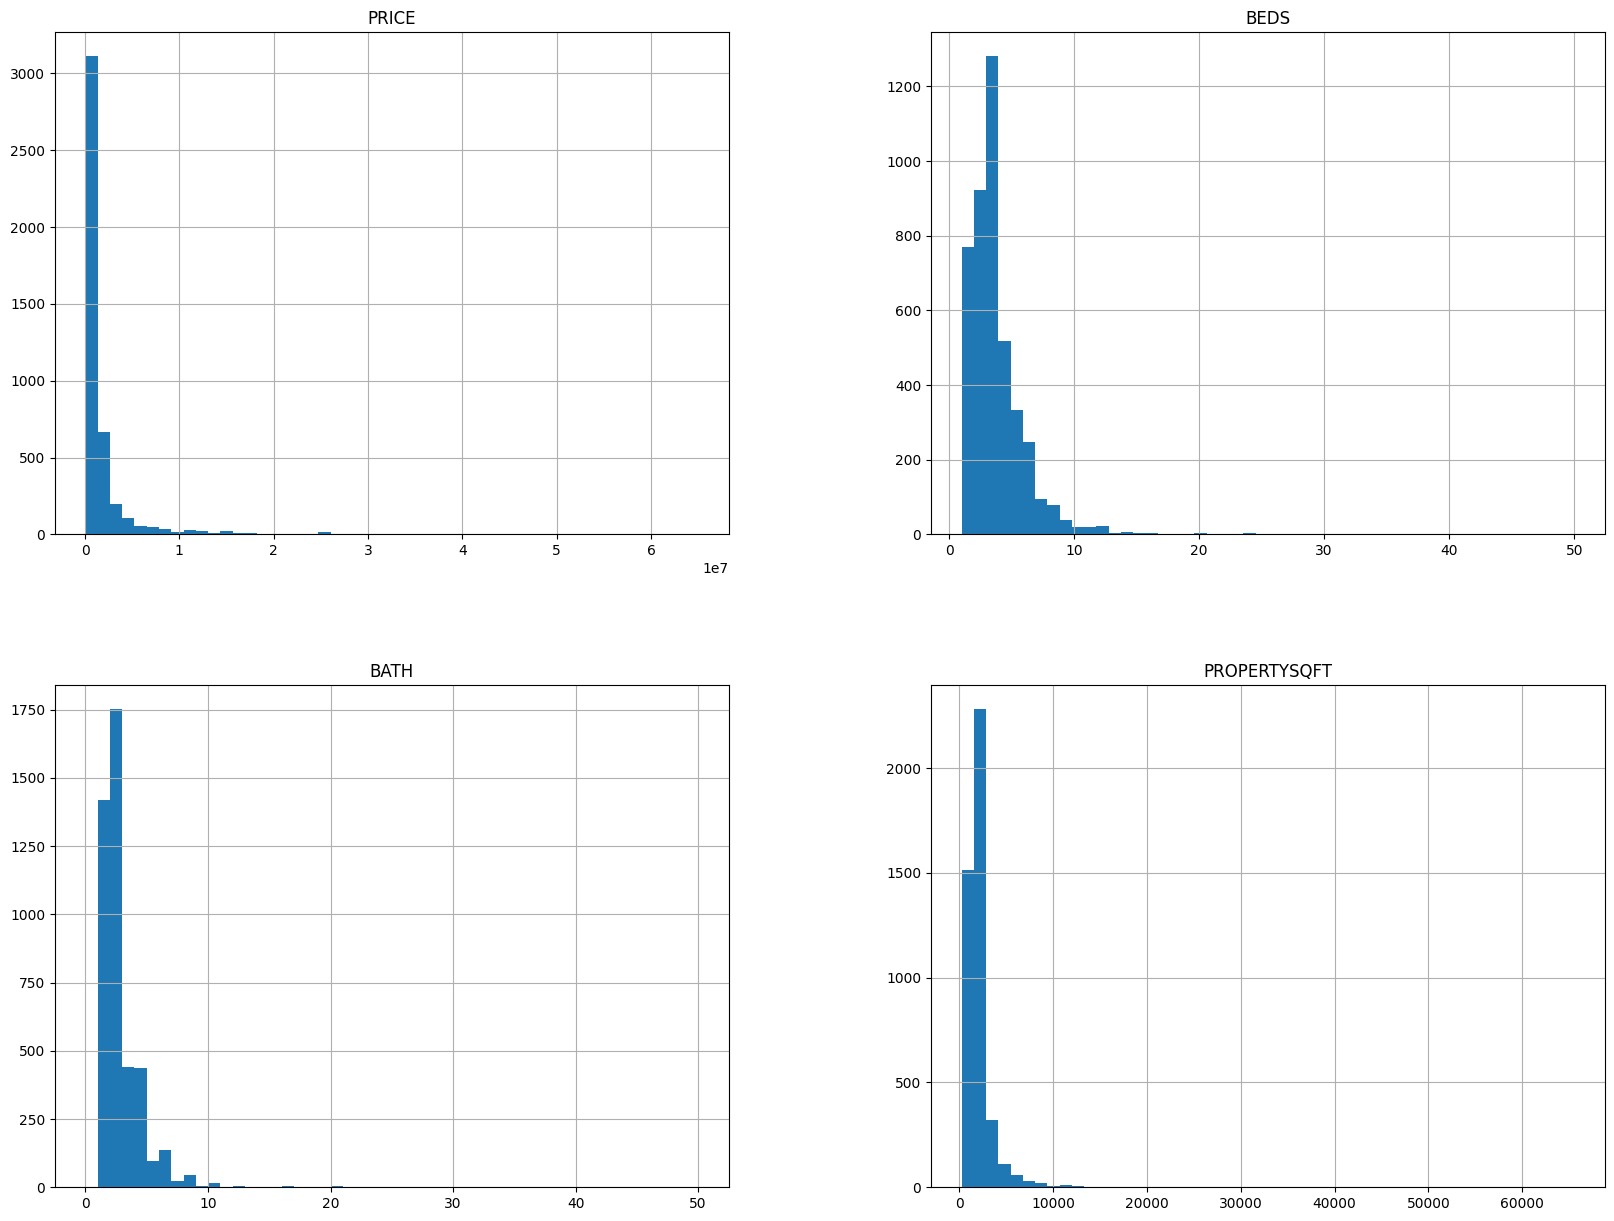

In [ ]:
housing_clean.hist(bins=50, figsize=(20,15))
plt.show()

array([[<Axes: xlabel='PRICE', ylabel='PRICE'>,
        <Axes: xlabel='BEDS', ylabel='PRICE'>,
        <Axes: xlabel='BATH', ylabel='PRICE'>,
        <Axes: xlabel='PROPERTYSQFT', ylabel='PRICE'>],
       [<Axes: xlabel='PRICE', ylabel='BEDS'>,
        <Axes: xlabel='BEDS', ylabel='BEDS'>,
        <Axes: xlabel='BATH', ylabel='BEDS'>,
        <Axes: xlabel='PROPERTYSQFT', ylabel='BEDS'>],
       [<Axes: xlabel='PRICE', ylabel='BATH'>,
        <Axes: xlabel='BEDS', ylabel='BATH'>,
        <Axes: xlabel='BATH', ylabel='BATH'>,
        <Axes: xlabel='PROPERTYSQFT', ylabel='BATH'>],
       [<Axes: xlabel='PRICE', ylabel='PROPERTYSQFT'>,
        <Axes: xlabel='BEDS', ylabel='PROPERTYSQFT'>,
        <Axes: xlabel='BATH', ylabel='PROPERTYSQFT'>,
        <Axes: xlabel='PROPERTYSQFT', ylabel='PROPERTYSQFT'>]],
      dtype=object)

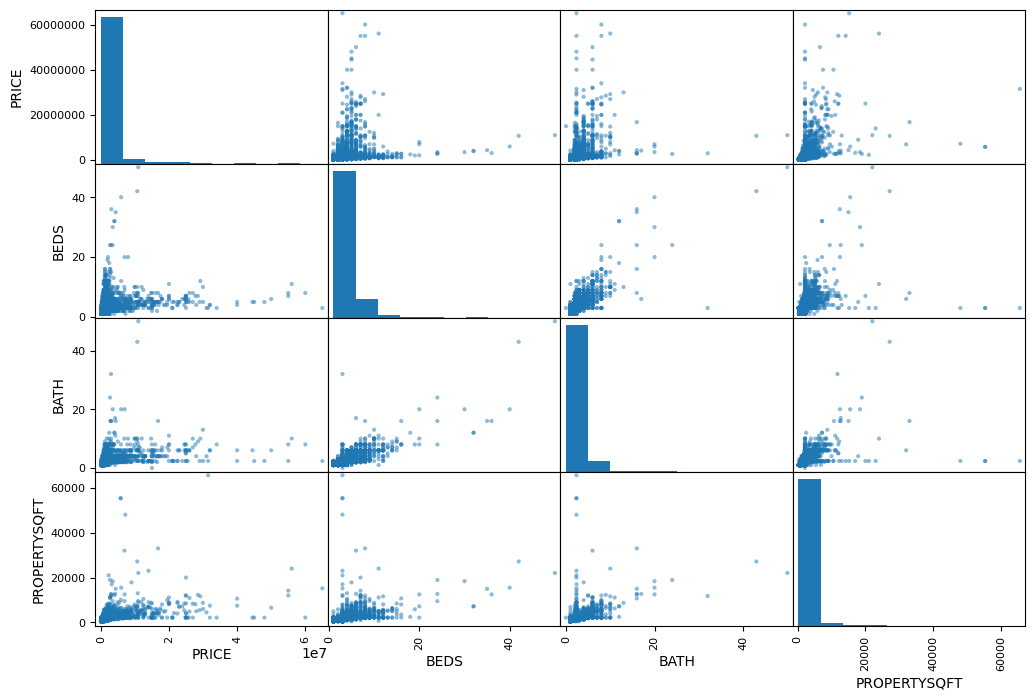

In [ ]:
attributes = ["PRICE", "BEDS", "BATH",
              "PROPERTYSQFT"]
scatter_matrix(housing_clean[attributes], figsize=(12, 8))

#Step 6: Transformations
I'm applying four transformations to my data: squaring, cubing, logarithmic and exponential

In [ ]:
nbins = 10

from sklearn.preprocessing import KBinsDiscretizer
kb = KBinsDiscretizer(n_bins=nbins, strategy='uniform')

(array([4.136e+03, 1.430e+02, 4.800e+01, 3.100e+01, 1.300e+01, 1.000e+00,
        4.000e+00, 2.000e+00, 3.000e+00, 2.000e+00]),
 array([4.950000e+04, 6.544550e+06, 1.303960e+07, 1.953465e+07,
        2.602970e+07, 3.252475e+07, 3.901980e+07, 4.551485e+07,
        5.200990e+07, 5.850495e+07, 6.500000e+07]),
 <BarContainer object of 10 artists>)

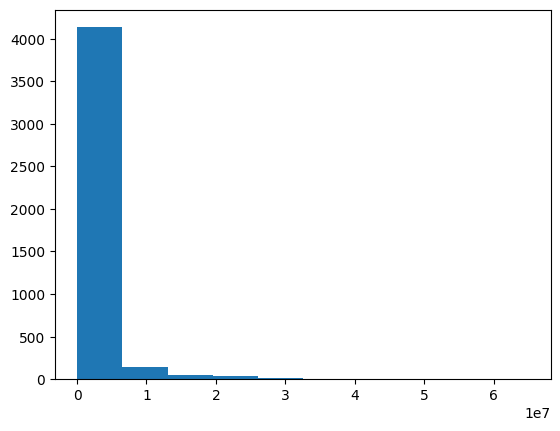

In [ ]:
#Bin the data
plt.hist(housing_clean["PRICE"], bins=nbins)

(array([3.825e+03, 4.800e+02, 5.800e+01, 9.000e+00, 3.000e+00, 1.000e+00,
        3.000e+00, 2.000e+00, 1.000e+00, 1.000e+00]),
 array([ 1. ,  5.9, 10.8, 15.7, 20.6, 25.5, 30.4, 35.3, 40.2, 45.1, 50. ]),
 <BarContainer object of 10 artists>)

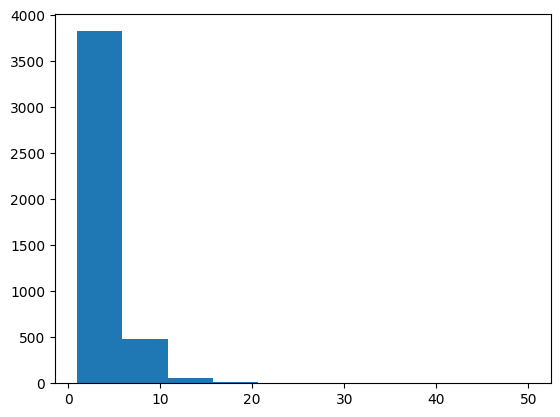

In [ ]:
plt.hist(housing_clean["BEDS"], bins=nbins)

(array([4.363e+03, 9.000e+00, 3.000e+00, 1.000e+00, 3.000e+00, 1.000e+00,
        1.000e+00, 1.000e+00, 0.000e+00, 1.000e+00]),
 array([1.0000e+00, 2.5090e+02, 5.0080e+02, 7.5070e+02, 1.0006e+03,
        1.2505e+03, 1.5004e+03, 1.7503e+03, 2.0002e+03, 2.2501e+03,
        2.5000e+03]),
 <BarContainer object of 10 artists>)

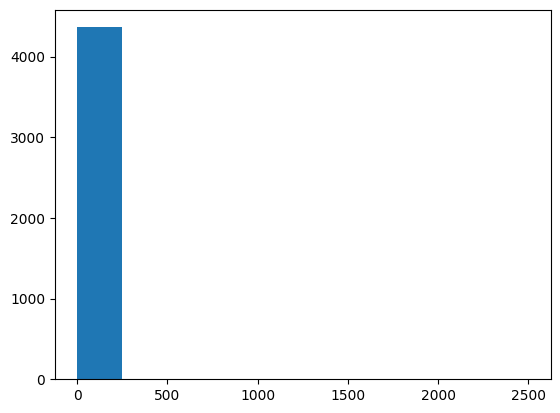

In [ ]:
#Square the data and plot
plt.hist(housing_clean["BEDS"]**2, bins=nbins)

(array([4.372e+03, 3.000e+00, 3.000e+00, 2.000e+00, 0.000e+00, 2.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([1.000000e+00, 1.250090e+04, 2.500080e+04, 3.750070e+04,
        5.000060e+04, 6.250050e+04, 7.500040e+04, 8.750030e+04,
        1.000002e+05, 1.125001e+05, 1.250000e+05]),
 <BarContainer object of 10 artists>)

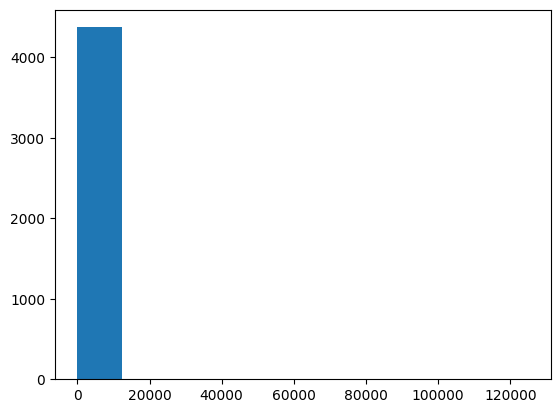

In [ ]:
#Cube the data and plot
plt.hist(housing_clean["BEDS"]**3, bins=nbins)

(array([ 770.,  923., 1281.,  519.,  675.,  137.,   58.,    9.,    6.,
           5.]),
 array([0.        , 0.3912023 , 0.7824046 , 1.1736069 , 1.5648092 ,
        1.9560115 , 2.3472138 , 2.7384161 , 3.1296184 , 3.5208207 ,
        3.91202301]),
 <BarContainer object of 10 artists>)

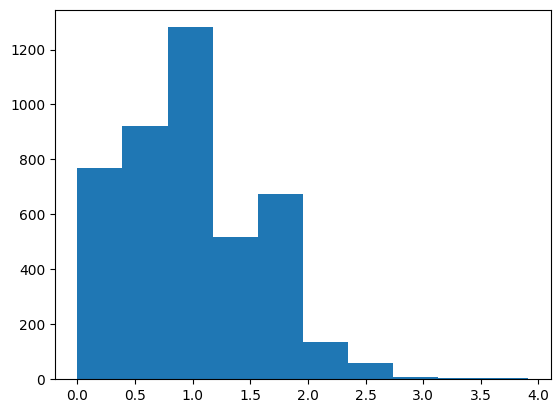

In [ ]:
#Transform the data with log and plot
plt.hist(np.log(housing_clean["BEDS"]), bins=nbins)

I'll probably want to use this transformation for the bedrooms and bathrooms.  

(array([4.382e+03, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([2.71828183e+00, 5.18470553e+20, 1.03694111e+21, 1.55541166e+21,
        2.07388221e+21, 2.59235276e+21, 3.11082332e+21, 3.62929387e+21,
        4.14776442e+21, 4.66623498e+21, 5.18470553e+21]),
 <BarContainer object of 10 artists>)

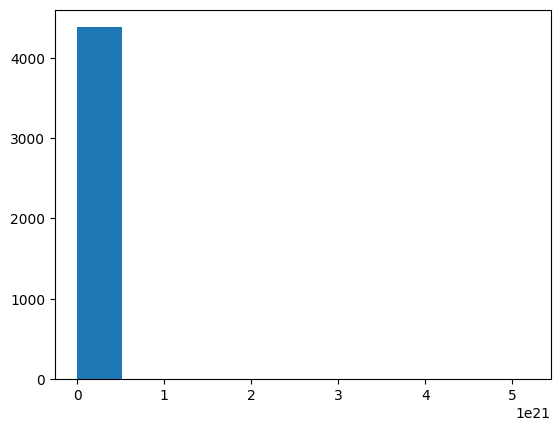

In [ ]:
#Transform the data with exp and plot
plt.hist(np.exp(housing_clean["BEDS"]), bins=nbins)